<a href="https://colab.research.google.com/github/hasanasyarie/PSDS_KelasMahir/blob/main/Hasan_Asy_Arie_1800015105_TugasB4P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Machine Learning pada Data Weather AUS

## Impor Library

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## Membuka Data

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanasyarie/PSDS_KelasMahir/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#**Eksploratory Data Analysis**

### Dimensi Data

In [60]:
df.shape

(145460, 23)

### Variabel dan Dataset

In [61]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [62]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Mengecek Missing Data

In [64]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

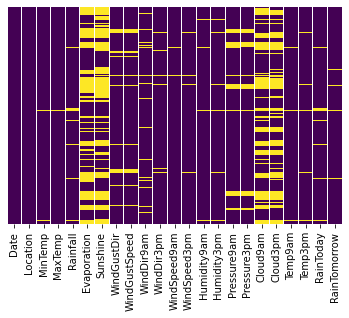

In [65]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

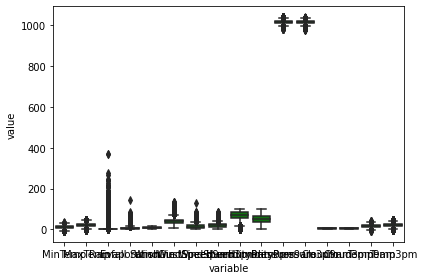

In [66]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

### Melihat Korelasi Data

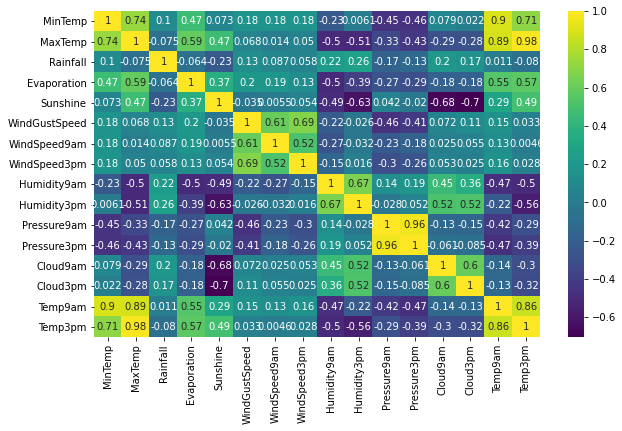

In [67]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Mengecek Statistik Data

In [68]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#**Data Preprocessing**

### Seleksi Kolom

In [69]:
df = df.drop(columns = ['Date', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


### Mengisi NaN

In [70]:
df=df.fillna(method='bfill')
df=df.fillna(method='ffill')

In [71]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [72]:
# Mengubah tipe data object menjadi category
df["Location"] = df["Location"].astype('category')
df["WindGustDir"] = df["WindGustDir"].astype('category')
df["WindDir9am"] = df["WindDir9am"].astype('category')
df["WindDir3pm"] = df["WindDir3pm"].astype('category')
df["RainToday"] = df["RainToday"].astype('category')
df["RainTomorrow"] = df["RainTomorrow"].astype('category')
df.dtypes

Location         category
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow     category
dtype: object

### Melakukan Pengkodean (Encoding)

In [73]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Perth               3193
Melbourne           3193
Hobart              3193
Darwin              3193
Adelaide            3193
Cairns              3040
Townsville          3040
Wollongong          3040
Bendigo             3040
Ballarat            3040
GoldCoast           3040
AliceSprings        3040
Launceston          3040
Albury              3040
Albany              3040
MountGambier        3040
MountGinini         3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
NorfolkIsland       3009
Sale                3009
Witchcliffe         3009
Williamtown         3009
Watsonia            3009
BadgerysCreek       3009
WaggaWagga          3009
SydneyAirport       3009
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Woomera             3009
Richmond            3009
Portland            3009
PerthAirport        3009
MelbourneAirport    3009
Mildura             3009


In [74]:
df['WindGustDir'].value_counts()

SSE    13367
SSW    11952
W      10112
SE      9603
SW      9486
N       9422
E       9391
S       9302
WSW     9231
WNW     8455
NW      8417
ENE     8260
ESE     7741
NE      7261
NNE     6741
NNW     6719
Name: WindGustDir, dtype: int64

In [75]:
df['WindDir9am'].value_counts()

N      12782
SE     10022
NW      9854
SSE     9824
E       9720
S       9263
SW      9105
W       8865
NNE     8826
NNW     8633
NE      8550
ENE     8422
SSW     8066
ESE     8020
WNW     7860
WSW     7648
Name: WindDir9am, dtype: int64

In [76]:
df['WindDir3pm'].value_counts()

SE     11186
S      10344
W      10327
SSE    10167
WSW     9616
SW      9463
NE      9115
N       9039
WNW     9027
NW      8916
ESE     8793
E       8582
SSW     8301
NNW     7977
ENE     7940
NNE     6667
Name: WindDir3pm, dtype: int64

In [77]:
df['RainToday'].value_counts()

No     111713
Yes     33747
Name: RainToday, dtype: int64

In [78]:
df['RainTomorrow'].value_counts()

No     111716
Yes     33744
Name: RainTomorrow, dtype: int64

In [79]:
df["Location"] = df["Location"].cat.codes
df["WindGustDir"] = df["WindGustDir"].cat.codes
df["WindDir9am"] = df["WindDir9am"].cat.codes
df["WindDir3pm"] = df["WindDir3pm"].cat.codes
df["RainToday"] = df["RainToday"].cat.codes
df["RainTomorrow"] = df["RainTomorrow"].cat.codes
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0


### Menghapus Outlier

In [80]:
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Location         25.0
MinTemp           9.2
MaxTemp          10.3
Rainfall          0.8
Evaporation       5.8
Sunshine          5.5
WindGustDir       8.0
WindGustSpeed    17.0
WindDir9am        8.0
WindDir3pm        8.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Temp9am           9.2
Temp3pm           9.9
RainToday         0.0
RainTomorrow      0.0
dtype: float64


In [81]:
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0


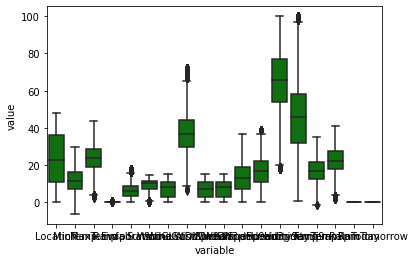

In [82]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

### Normalisasi Data

In [83]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.545961,0.496350,0.6,0.674157,0.848276,0.866667,0.575758,0.866667,0.933333,0.540541,0.615385,0.646341,0.212121,0.498638,0.506329,0.0,0.0
1,0.041667,0.378830,0.549878,0.0,0.674157,0.848276,0.933333,0.575758,0.400000,1.000000,0.108108,0.564103,0.317073,0.242424,0.506812,0.569620,0.0,0.0
2,0.041667,0.532033,0.564477,0.0,0.674157,0.848276,1.000000,0.606061,0.866667,1.000000,0.513514,0.666667,0.243902,0.292929,0.610354,0.541772,0.0,0.0
3,0.041667,0.428969,0.620438,0.0,0.674157,0.848276,0.266667,0.272727,0.600000,0.000000,0.297297,0.230769,0.329268,0.151515,0.531335,0.625316,0.0,0.0
4,0.041667,0.660167,0.725061,1.0,0.674157,0.848276,0.866667,0.530303,0.066667,0.466667,0.189189,0.512821,0.780488,0.323232,0.523161,0.706329,0.0,0.0


### Memilih Variable Target & Variabel Independent

In [84]:
y=df_norm['RainTomorrow']
X=df_norm.drop(columns=['RainTomorrow'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 0. 0. ... 0. 0. 0.]
[[0.04166667 0.545961   0.49635036 ... 0.4986376  0.50632911 0.        ]
 [0.04166667 0.37883008 0.54987835 ... 0.50681199 0.56962025 0.        ]
 [0.04166667 0.53203343 0.56447689 ... 0.61035422 0.54177215 0.        ]
 ...
 [0.85416667 0.32311978 0.59367397 ... 0.37874659 0.61518987 0.        ]
 [0.85416667 0.38997214 0.59610706 ... 0.44959128 0.61265823 0.        ]
 [0.85416667 0.58774373 0.59610706 ... 0.44686649 0.4835443  0.        ]]


## **Klasifikasi**

In [85]:
y = df.RainTomorrow.values
x_data = df.drop(['RainTomorrow'], axis = 1)

In [86]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.21,random_state=0)

In [88]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

**[1] KNN Algorithm**

In [94]:
knn = KNeighborsClassifier(n_neighbors = 9)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(9, knn.score(x_test.T, y_test.T)*100))

9 NN Score: 83.30%


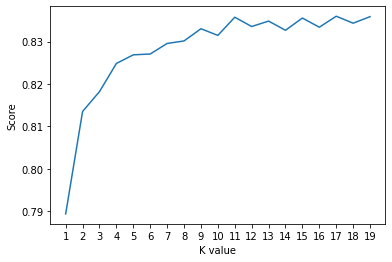

Maximum KNN Score is 83.60%


In [95]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**[2] Support Vector Machine (SVM) Algorithm**

In [52]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.91%


**[3] Naive Bayes Algorithm**

In [57]:
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 79.76%
